In [3]:
import tensorflow as st
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import pathlib
import matplotlib.image as img
import imageio
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

In [4]:
#read dataset
path = pathlib.Path('/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images')


In [5]:
#read two data folders
Parasitized = list(path.glob('Parasitized/*'))
Uninfected = list(path.glob('Uninfected/*'))
data = {
    'Parasitized' : Parasitized,
    'Uninfected' : Uninfected
}

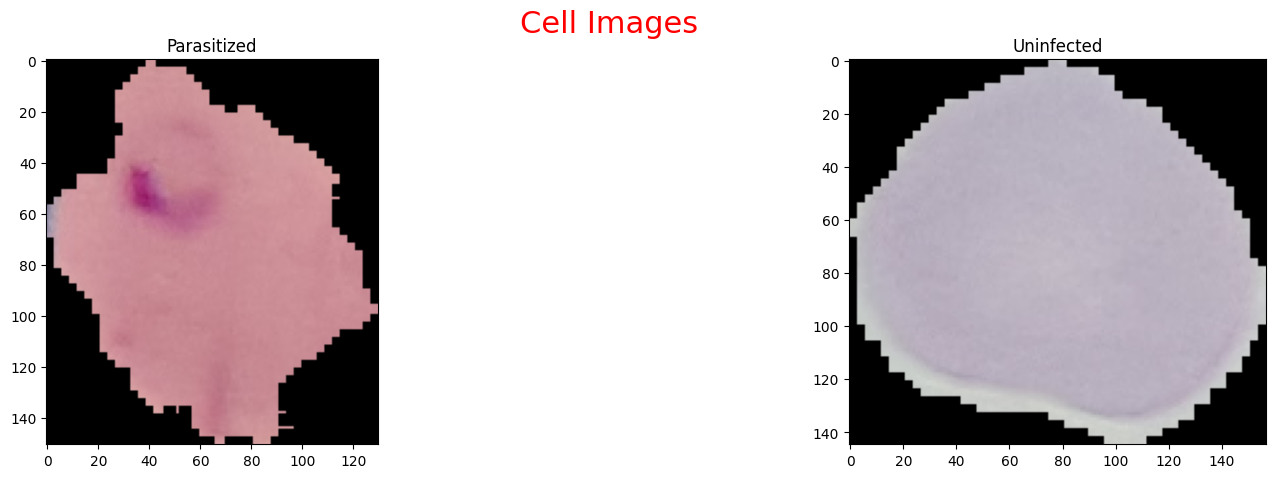

In [6]:
fig,ax = plt.subplots(ncols = 2, figsize = (20,5))
fig.suptitle('Cell Images', color = 'red', fontsize = 22)

Parasitized_img = img.imread(Parasitized[0])
Uninfected_img = img.imread(Uninfected[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)
    
ax[0].imshow(Parasitized_img)
ax[1].imshow(Uninfected_img)

In [7]:
data_generator=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [8]:
train_gen = data_generator.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [9]:
test_gen = data_generator.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [10]:
model = Sequential()

#add Conv layer with filters, kernel, padding, activation, input shape
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [128,128,3])) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#add batch normalization layer
model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())
model.add(Dropout(0.3))

#add batch normalization layer
model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())
model.add(Dropout(0.4))

#add Flatten layer ---> 1D
model.add(Flatten())

#add Fully Connnected Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
#add output layer
model.add(Dense(1,activation='sigmoid'))
    


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,304,705 (16.42 MB)

 Trainable params: 4,304,513 (16.42 MB)

 Non-trainable params: 192 (768.00 B)

In [12]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [14]:
#fit model
model_history = model.fit(train_gen,
                         epochs = 5,
                         validation_data = test_gen)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 542s 786ms/step - accuracy: 0.5126 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 521s 756ms/step - accuracy: 0.5042 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 519s 753ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 520s 754ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 510s 739ms/step - accuracy: 0.4913 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931


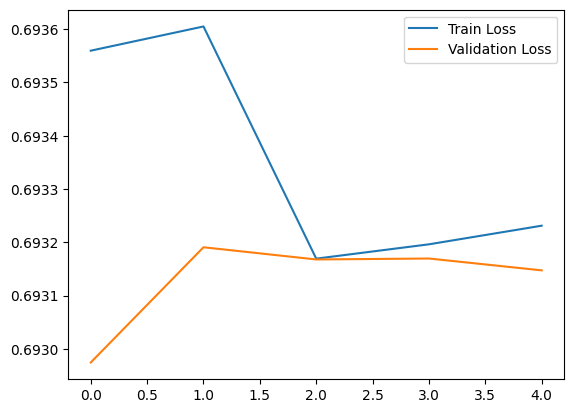

In [15]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

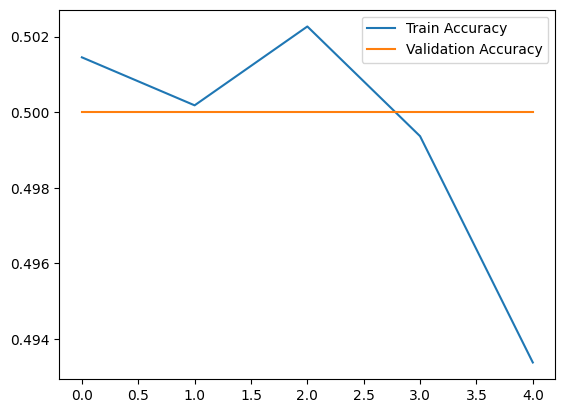

In [16]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()